# IMDB review classifiation

# Import required packages

In [141]:
import tensorflow as tf
import matplotlib as plt
from tensorflow import keras

In [142]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Encode reviews as numpy vector 

In [143]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [144]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [145]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# The Keras model definition

In [146]:
from keras import models
from keras import layers

In [147]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [188]:
# model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.01), loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy])


In [189]:
from keras import losses
from keras import metrics
from keras import optimizers

# Model building

In [190]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

/home/arif/anaconda3/envs/myenv1/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [191]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
history = model.fit(x_train,y_train, epochs = 4, batch_size = 512, validation_data = (x_test, y_test))
# results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8026 - loss: 0.5057 - val_accuracy: 0.8730 - val_loss: 0.3713
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8978 - loss: 0.2948 - val_accuracy: 0.8884 - val_loss: 0.2911
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9163 - loss: 0.2288 - val_accuracy: 0.8861 - val_loss: 0.2839
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9302 - loss: 0.1937 - val_accuracy: 0.8848 - val_loss: 0.2860


# Plot results

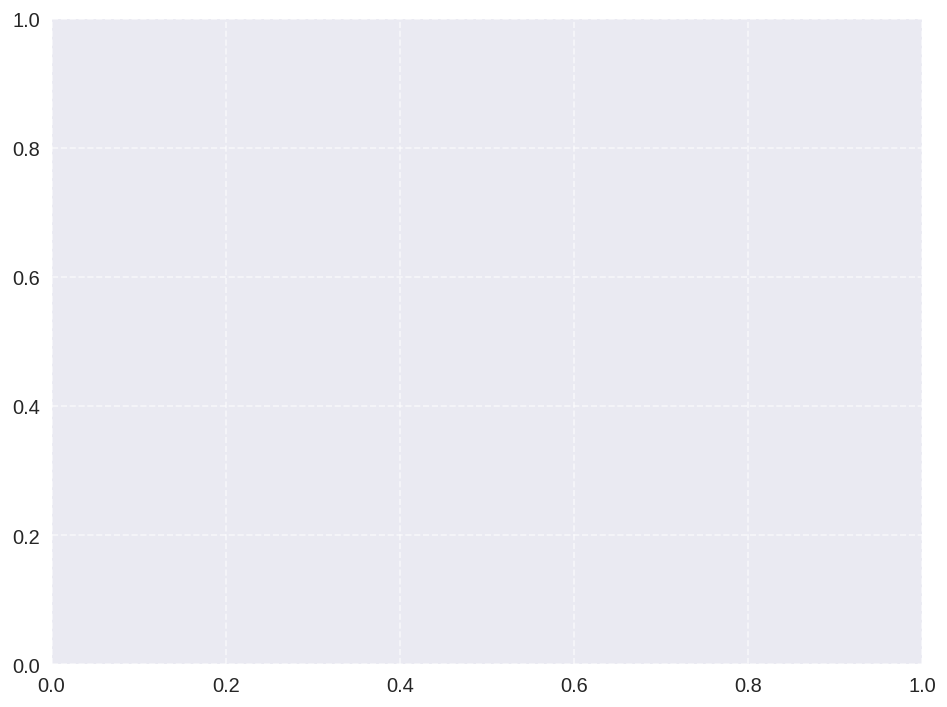

In [192]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=120)  # Bigger and sharper
plt.grid(True, linestyle='--', alpha=0.6)
plt.style.use('seaborn-v0_8')   # or 'ggplot', 'fivethirtyeight'
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
history_dict = history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_acc)+1)

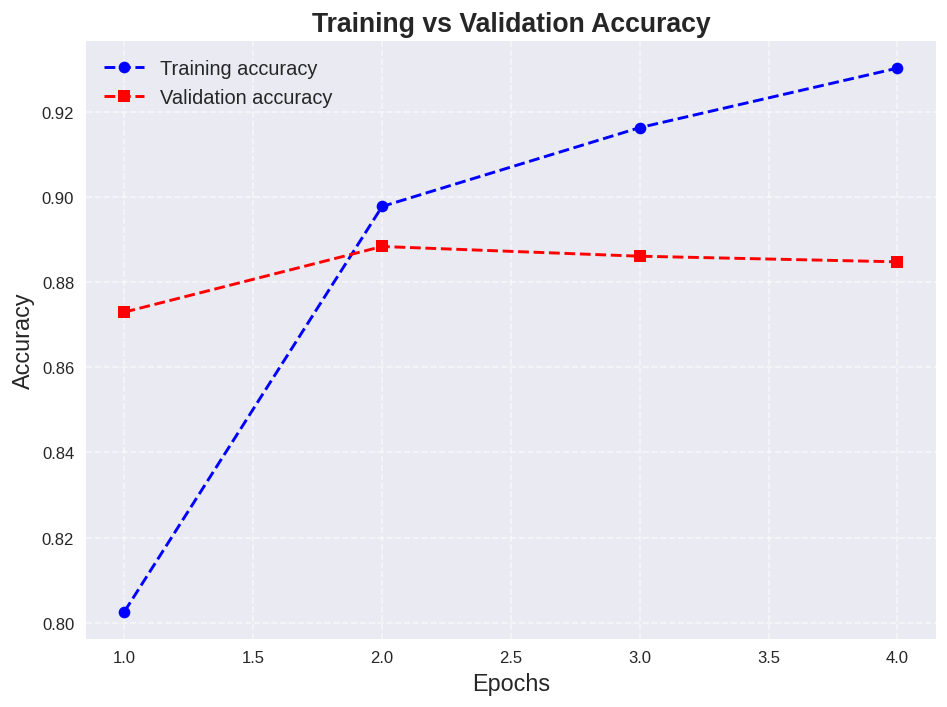

In [193]:
plt.figure(figsize=(8,6), dpi=120)
plt.plot(epochs, train_acc, 'o--', label = 'Training accuracy', color = 'blue')
plt.plot(epochs, val_acc, 's--', label = 'Validation accuracy', color = 'red')
plt.title("Training vs Validation Accuracy", fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
plt.savefig("imdb_accuracy.png", dpi=300)
plt.show()

<Figure size 800x550 with 0 Axes>

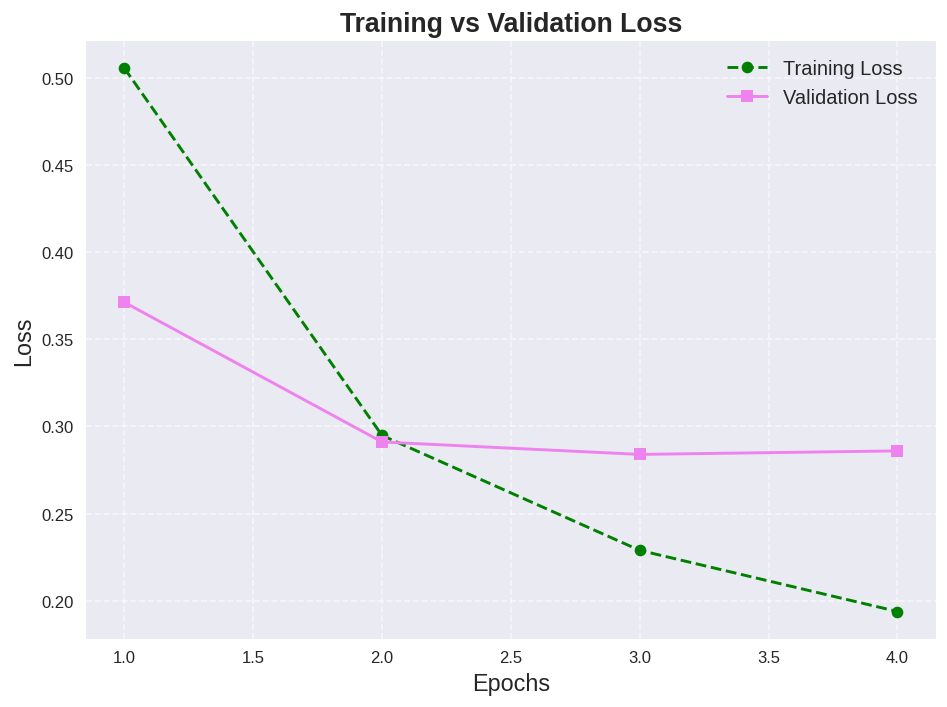

In [194]:
plt.clf()
plt.figure(figsize=(8,6), dpi=120)
plt.plot(epochs, train_loss, 'o--', label='Training Loss', color='green')
plt.plot(epochs, val_loss, 's-', label='Validation Loss', color='violet')
plt.title("Training vs Validation Loss", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
plt.show()

# Make animation of the results

In [195]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os

def animate_keras_history(history, metric='loss', save_path='animation.gif', interval=500):
    """
    Animate training and validation metric curves from Keras history.

    Parameters:
    - history: Keras History object (history returned by model.fit)
    - metric: 'loss' or 'accuracy' (can be 'binary_accuracy', 'categorical_accuracy', etc.)
    - save_path: output file path for GIF or MP4
    - interval: milliseconds per frame
    """
    history_dict = history.history

    # Training and validation values
    train_values = history_dict[metric]
    val_values = history_dict.get('val_' + metric)
    
    if val_values is None:
        raise ValueError("Validation data not found in history. Use validation_split or validation_data in model.fit()")

    epochs = range(1, len(train_values) + 1)

    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_xlim(1, len(train_values))
    ax.set_ylim(min(min(train_values), min(val_values)) * 0.9,
                max(max(train_values), max(val_values)) * 1.1)
    ax.set_xlabel('Epochs', fontsize=14)
    ax.set_ylabel(metric.capitalize(), fontsize=14)
    ax.set_title(f'Training vs Validation {metric.capitalize()}', fontsize=16, fontweight='bold')
    ax.grid(True)

    line1, = ax.plot([], [], 'bo-', label=f'Training {metric}')
    line2, = ax.plot([], [], 'ro-', label=f'Validation {metric}')
    ax.legend(fontsize=12)

    # Animation function
    def animate(i):
        line1.set_data(epochs[:i+1], train_values[:i+1])
        line2.set_data(epochs[:i+1], val_values[:i+1])
        return line1, line2

    ani = animation.FuncAnimation(fig, animate, frames=len(epochs), interval=interval, blit=True)

    # Save animation
    ext = os.path.splitext(save_path)[1].lower()
    if ext == '.gif':
        ani.save(save_path, writer='pillow', dpi=200)
    elif ext in ['.mp4', '.avi']:
        ani.save(save_path, writer='ffmpeg', dpi=200)
    else:
        raise ValueError("Unsupported file format. Use '.gif' or '.mp4'")

    plt.close(fig)  # avoid duplicate display
    return ani


In [196]:
# Suppose you trained your model like this:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

# Animate training and validation loss
ani_loss = animate_keras_history(history, metric='loss', save_path='loss_animation.gif')

# Animate training and validation accuracy
ani_acc = animate_keras_history(history, metric='accuracy', save_path='accuracy_animation.gif')

# Display in notebook
HTML(ani_loss.to_jshtml())


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9383 - loss: 0.1710 - val_accuracy: 0.9390 - val_loss: 0.1754
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9481 - loss: 0.1498 - val_accuracy: 0.9328 - val_loss: 0.1806
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9545 - loss: 0.1320 - val_accuracy: 0.9182 - val_loss: 0.2106
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9599 - loss: 0.1194 - val_accuracy: 0.9204 - val_loss: 0.2106
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9675 - loss: 0.1023 - val_accuracy: 0.8908 - val_loss: 0.3084
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9678 - loss: 0.0972 - val_accuracy: 0.9088 - val_loss: 0.2490
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9734 - loss: 0.0849 - val_accuracy: 0.9070 - val_loss: 0.2688
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9764 - loss: 0.0777 - val_accuracy: 0.8850 - val_loss:

In [187]:
# Display in notebook
HTML(ani_acc.to_jshtml())

In [197]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os

def animate_loss_accuracy(history, save_path='training_animation.gif', interval=500):
    """
    Animate training and validation loss and accuracy curves side by side.

    Parameters:
    - history: Keras History object (returned by model.fit)
    - save_path: output file path for GIF or MP4
    - interval: milliseconds per frame
    """
    history_dict = history.history

    # Extract values
    train_loss = history_dict['loss']
    val_loss = history_dict.get('val_loss')
    if val_loss is None:
        raise ValueError("Validation loss not found. Use validation_split or validation_data in model.fit()")

    train_acc = history_dict.get('accuracy') or history_dict.get('binary_accuracy')
    val_acc = history_dict.get('val_accuracy') or history_dict.get('val_binary_accuracy')
    if train_acc is None or val_acc is None:
        raise ValueError("Accuracy not found in history. Ensure 'accuracy' or 'binary_accuracy' metrics were used")

    epochs = range(1, len(train_loss)+1)

    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

    # Loss subplot
    ax1.set_xlim(1, len(epochs))
    ax1.set_ylim(min(min(train_loss), min(val_loss)) * 0.9, max(max(train_loss), max(val_loss)) * 1.1)
    ax1.set_xlabel('Epochs', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
    ax1.grid(True)
    line1, = ax1.plot([], [], 'bo-', label='Training Loss')
    line2, = ax1.plot([], [], 'ro-', label='Validation Loss')
    ax1.legend(fontsize=10)

    # Accuracy subplot
    ax2.set_xlim(1, len(epochs))
    ax2.set_ylim(min(min(train_acc), min(val_acc)) * 0.9, max(max(train_acc), max(val_acc)) * 1.1)
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
    ax2.grid(True)
    line3, = ax2.plot([], [], 'go-', label='Training Accuracy')
    line4, = ax2.plot([], [], 'mo-', label='Validation Accuracy')
    ax2.legend(fontsize=10)

    # Animation function
    def animate(i):
        line1.set_data(epochs[:i+1], train_loss[:i+1])
        line2.set_data(epochs[:i+1], val_loss[:i+1])
        line3.set_data(epochs[:i+1], train_acc[:i+1])
        line4.set_data(epochs[:i+1], val_acc[:i+1])
        return line1, line2, line3, line4

    ani = animation.FuncAnimation(fig, animate, frames=len(epochs), interval=interval, blit=True)

    # Save animation
    ext = os.path.splitext(save_path)[1].lower()
    if ext == '.gif':
        ani.save(save_path, writer='pillow', dpi=200)
    elif ext in ['.mp4', '.avi']:
        ani.save(save_path, writer='ffmpeg', dpi=200)
    else:
        raise ValueError("Unsupported file format. Use '.gif' or '.mp4'")

    plt.close(fig)
    return ani


In [198]:
# Suppose you have a Keras history object
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

# Create combined animation
ani = animate_loss_accuracy(history, save_path='combined_training.gif')

# Display in Jupyter Notebook
HTML(ani.to_jshtml())


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9856 - loss: 0.0537 - val_accuracy: 0.8938 - val_loss: 0.3603
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9880 - loss: 0.0484 - val_accuracy: 0.8914 - val_loss: 0.3782
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9878 - loss: 0.0455 - val_accuracy: 0.8862 - val_loss: 0.4192
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9905 - loss: 0.0387 - val_accuracy: 0.8866 - val_loss: 0.4347
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9920 - loss: 0.0331 - val_accuracy: 0.8902 - val_loss: 0.4384
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9923 - loss: 0.0317 - val_accuracy: 0.8862 - val_loss: 0.4634
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9930 - loss: 0.0282 - val_accuracy: 0.8870 - val_loss: 0.4856
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9948 - loss: 0.0246 - val_accuracy: 0.8844 - val_loss:

In [199]:
ani = animate_loss_accuracy(history, save_path='training_animation.gif')